In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Loading Successfull")

Data Loading Successfull


In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
Hours = np.array(data.Hours)
Hours

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [17]:
Scores = np.array(data.Scores)
Scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


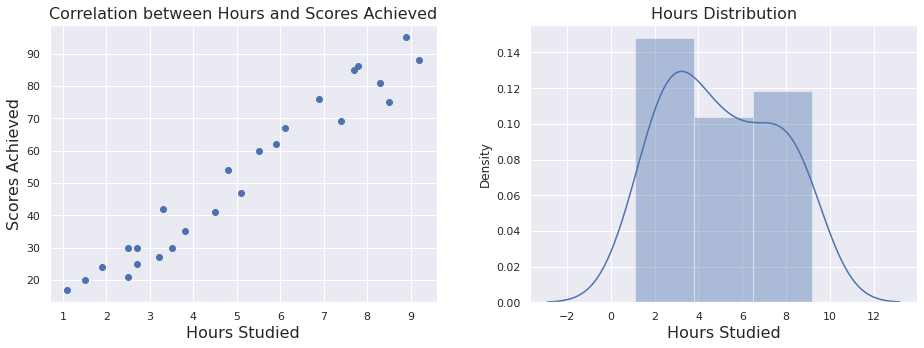

In [20]:
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(121)
plt.scatter(x = Hours, y = Scores)
plt.xlabel('Hours Studied', fontsize = 16)
plt.ylabel('Scores Achieved', fontsize = 16)
plt.title("Correlation between Hours and Scores Achieved", fontsize = 16)

plt.subplot(122)
sns.distplot(Hours)
plt.xlabel("Hours Studied", fontsize = 16)
plt.title("Hours Distribution", fontsize= 16)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(Hours,Scores,test_size=0.1,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain.reshape(-1,1),ytrain)
print("Training complete.")

Training complete.


In [26]:
print("y intercept:",model.intercept_)
print("slope:",model.coef_)

y intercept: 2.826892353899737
slope: [9.68207815]


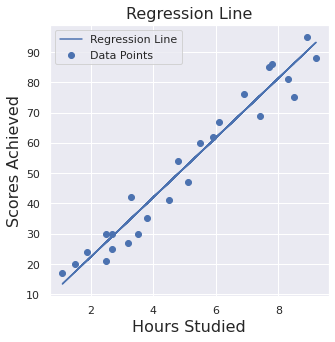

In [30]:
line = model.coef_ * Hours + model.intercept_
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(Hours, Scores, label = 'Data Points')
plt.plot(Hours, line, label = 'Regression Line')
plt.legend()
plt.xlabel("Hours Studied", fontsize = 16)
plt.ylabel("Scores Achieved", fontsize = 16)
plt.title("Regression Line", fontsize = 16)
plt.show()

In [40]:
prediction = model.predict(x_test)
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
0,81,84.314547
1,30,27.156965
2,21,27.156965
3,76,70.517889
4,62,60.663134


In [37]:
from sklearn.metrics import mean_absolute_error

# calculate the error
err = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error: ", err)

Mean Absolute Error:  3.826704789333037


In [38]:
hours = [[9.25]]

predict_score = model.predict(hours)
print("Hours:", hours[0][0])
print("Predicted Score:", predict_score[0])

Hours: 9.25
Predicted Score: 93.67656425238496
